![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Skin lesion recognition in two classes: Benign vs. malignant

Based on https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48

In [ ]:
!wget https://www.dropbox.com/s/7ir1jixrs1aw55n/exp0.zip
!unzip -qq exp0.zip

--2023-09-20 12:18:13--  https://www.dropbox.com/s/7ir1jixrs1aw55n/exp0.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7ir1jixrs1aw55n/exp0.zip [following]
--2023-09-20 12:18:13--  https://www.dropbox.com/s/raw/7ir1jixrs1aw55n/exp0.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc97a90104ad8075b30a8f2f498e.dl.dropboxusercontent.com/cd/0/inline/CEEKuM0mo7DMsS1GlgqreuI1zmrxcn-BJpiQqWsNVO4a_14KRtQP2SduvTAgf35seqFJ7_B2yU1l2Ua9kvTDMjnyLg7r9fW0b5GVq9Z0rgb--U7xH_L6M37DZI-5MYGyovY/file# [following]
--2023-09-20 12:18:14--  https://uc97a90104ad8075b30a8f2f498e.dl.dropboxusercontent.com/cd/0/inline/CEEKuM0mo7DMsS1GlgqreuI1zmrxcn-BJpiQqWsNVO4a_14KRtQP2SduvTAgf35seqFJ7_B2yU1l2Ua9kvTDMjnyLg7r9fW0b5GVq9Z0rgb--U7xH_L6M37DZI-5MYGyovY/fil

In [ ]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train, validation and test data directory

train_dir = "exp0/train/"
val_dir   = "exp0/val/"
test_dir  = "exp0/test/"

train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.RandomHorizontalFlip(),transforms.ToTensor()]))

val_set = ImageFolder(val_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 64, 64])
   Classes:  ['class_0', 'class_1']


In [ ]:
!wget https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
from cnn_utils import *
print('cnn_utils module has been loaded')

--2023-09-20 12:18:24--  https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2q224dslxdiag7i/cnn_utils.py [following]
--2023-09-20 12:18:24--  https://www.dropbox.com/s/raw/2q224dslxdiag7i/cnn_utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccedfa56b37330c46324d72780e.dl.dropboxusercontent.com/cd/0/inline/CEHFUqFia35wB-_MPNuIPspu1mLtfezmeiVKzJs5QlZjxHyNDQz0gaMsd11MTmAp8UWUWuy2rfKslLN7X0f70KrAk6jdnRjCRGemyhcVCy0Sm0BtfS5ucE8IfkmyShymL4s/file# [following]
--2023-09-20 12:18:25--  https://uccedfa56b37330c46324d72780e.dl.dropboxusercontent.com/cd/0/inline/CEHFUqFia35wB-_MPNuIPspu1mLtfezmeiVKzJs5QlZjxHyNDQz0gaMsd11MTmAp8UWUWuy2rfKslLN7X0f70KrAk6jdnRjCRGemyhcVCy0Sm0BtfS5ucE8Ifkm

Image: 15, Label : class_0


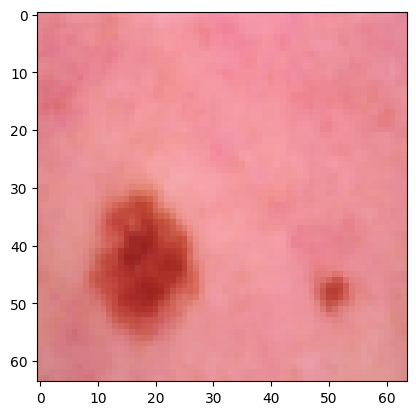

In [ ]:
#display an image in the training dataset
display_img(train_set,15)

In [ ]:
#load the train and validation into batches.

batch_size = 50

print(f"Length of Train Data : {len(train_set)}")
print(f"Length of Validation Data : {len(val_set)}")

train_dl = DataLoader(train_set, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl   = DataLoader(val_set  , batch_size*2, num_workers = 4, pin_memory = True)

Length of Train Data : 2700
Length of Validation Data : 300


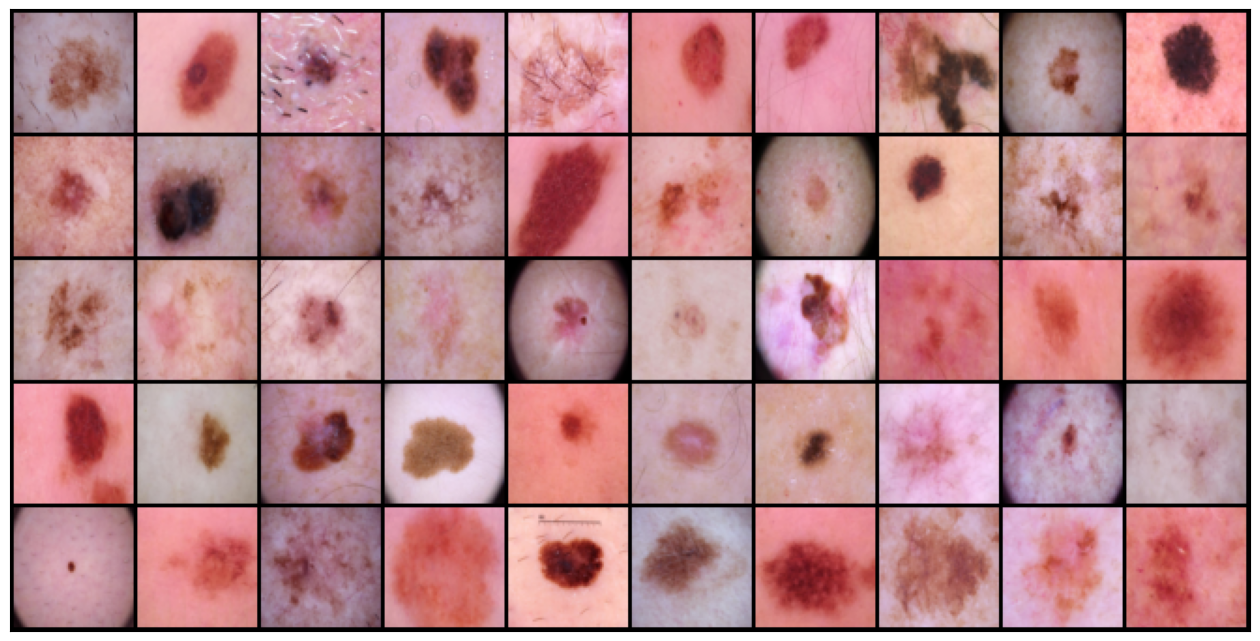

In [ ]:
show_batch(train_dl,nrow=10)

In [ ]:
# Reduced Model
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 8, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(8,16, kernel_size = 3, stride = 2, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(2048,1024),
            nn.Linear(1024,128),
            nn.Linear(128,2),
            nn.Dropout(0.25)
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
# Large Model
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(16384,128), #1024
            nn.ReLU(),
            nn.Linear(128, 64), #512
            nn.ReLU(),
            nn.Linear(64,2) #6
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=128, bias=True)
    (17): ReLU()
    (18): Linear(in_f

In [ ]:
#fitting the model on training data and record the result after each epoch
num_epochs = 100
opt_func   = torch.optim.Adam
lr         = 0.001
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      0.6496      0.5855      0.6933    ***     159.6 
    1      0.5944      0.5726      0.6967    ***     155.7 
    2      0.5712      0.5710      0.6967            158.7 
    3      0.5683      0.5540      0.7033    ***     156.0 
    4      0.5734      0.5758      0.6867            157.7 
    5      0.5858      0.5533      0.7067    ***     159.7 
    6      0.5661      0.5411      0.7133    ***     161.3 
    7      0.5676      0.5410      0.7200    ***     160.8 
    8      0.5443      0.5682      0.7067            159.8 
    9      0.5535      0.5318      0.7167            162.9 
   10      0.5321      0.6142      0.6667            162.4 
   11      0.5266      0.5290      0.7067            160.7 
   12      0.5101      0.5166      0.6933            159.8 
   13      0.5114      0.5298      0.7200            160.9 
   14      0.5161      0.5244 

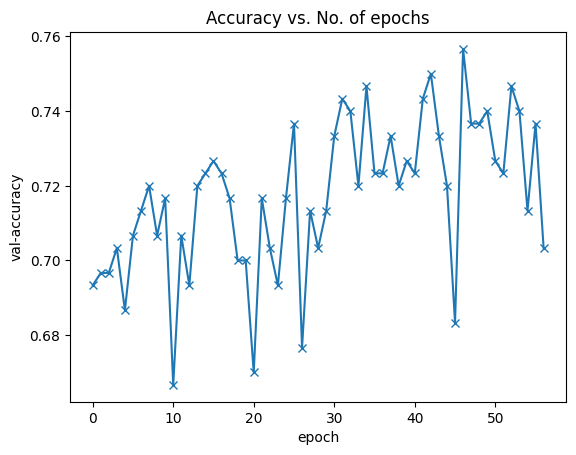

In [ ]:
plot_accuracies(history)

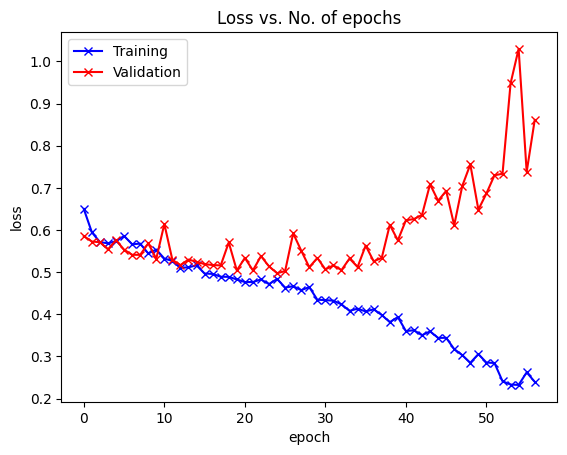

In [ ]:
plot_losses(history)

In [ ]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [ ]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred)
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.7683333333333333
 
Confusion Matrix = 
[[216  84]
 [ 55 245]]


In [ ]:
C1,acc1 = performance(model,train_set,'Training')
C2,acc2 = performance(model,val_set,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[1107  243]
 [ 130 1220]]
 
Training Accuracy = 0.8619
 
Validation Confusion Matrix = 
[[103  47]
 [ 26 124]]
 
Validation Accuracy = 0.7567
 
Testing Confusion Matrix = 
[[216  84]
 [ 55 245]]
 
Testing Accuracy = 0.7683
 
